In [5]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [7]:
import json
import pymongo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
from bson import json_util
import seaborn as sns

#Read csv and convert in json

data_csv = pd.read_csv ("C:/Users/DEEP/Downloads/deep dap/Food_Inspections_New2.csv")
data_csv.to_json("C:/Users/DEEP/Downloads/deep dap/Food_Inspections_New2.json")
df=pd.read_json("C:/Users/DEEP/Downloads/deep dap/Food_Inspections_New2.json")

data = df.to_dict('records')

#connection to MongoDB
myclient=pymongo.MongoClient("mongodb://localhost:27017/")
mydb=myclient["food_inspection"]
mycol = mydb.Food_Inspection

x=mycol.insert_many(data)
print(x)

In [8]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations
0,2545939,MCDONALDS,MCDONALDS,2349545.0,Restaurant,Risk 2 (Medium),3241 W PETERSON AVE,CHICAGO,IL,60659.0,12/22/2021,Canvass Re-Inspection,Pass,None
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,Restaurant,Risk 1 (High),4124 W NORTH AVE,CHICAGO,IL,60639.0,12/22/2021,Canvass Re-Inspection,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S..."
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,Grocery Store,Risk 2 (Medium),2600 N LINCOLN AVE,CHICAGO,IL,60614.0,12/21/2021,Canvass,Out of Business,None
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,Restaurant,Risk 1 (High),909 N MICHIGAN AVE,CHICAGO,IL,60611.0,12/21/2021,License,Pass,"7. NO DISCHARGE FROM EYES, NOSE, AND MOUTH | 5..."
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,Restaurant,Risk 1 (High),3529 W FULLERTON AVE,CHICAGO,IL,60647.0,12/21/2021,Complaint,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...


In [10]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations
0,2545939,MCDONALDS,MCDONALDS,2349545.0,Restaurant,Risk 2 (Medium),3241 W PETERSON AVE,CHICAGO,IL,60659.0,12/22/2021,Canvass Re-Inspection,Pass,None
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,Restaurant,Risk 1 (High),4124 W NORTH AVE,CHICAGO,IL,60639.0,12/22/2021,Canvass Re-Inspection,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S..."
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,Grocery Store,Risk 2 (Medium),2600 N LINCOLN AVE,CHICAGO,IL,60614.0,12/21/2021,Canvass,Out of Business,None
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,Restaurant,Risk 1 (High),909 N MICHIGAN AVE,CHICAGO,IL,60611.0,12/21/2021,License,Pass,"7. NO DISCHARGE FROM EYES, NOSE, AND MOUTH | 5..."
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,Restaurant,Risk 1 (High),3529 W FULLERTON AVE,CHICAGO,IL,60647.0,12/21/2021,Complaint,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 0 to 6932
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    6933 non-null   int64  
 1   DBA Name         6933 non-null   object 
 2   AKA Name         6878 non-null   object 
 3   License #        6932 non-null   float64
 4   Facility Type    6830 non-null   object 
 5   Risk             6928 non-null   object 
 6   Address          6933 non-null   object 
 7   City             6923 non-null   object 
 8   State            6928 non-null   object 
 9   Zip              6932 non-null   float64
 10  Inspection Date  6933 non-null   object 
 11  Inspection Type  6933 non-null   object 
 12  Results          6933 non-null   object 
 13  Violations       2680 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 812.5+ KB


In [12]:
# Replacing the spaces of columns names with an underscore and
df.columns =[x.lower().replace(' ','_') for x in df.columns]

In [13]:
df.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations'],
      dtype='object')

In [14]:
#Checking for the number of rows and columns in the dataset
df.shape

(6933, 14)

In [15]:
df['violations'].fillna('None',inplace = True)

In [16]:
df.shape

(6933, 14)

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.shape

(6774, 14)

In [19]:
df.isnull().sum()

inspection_id      0
dba_name           0
aka_name           0
license_#          0
facility_type      0
risk               0
address            0
city               0
state              0
zip                0
inspection_date    0
inspection_type    0
results            0
violations         0
dtype: int64

In [20]:
df['results'].value_counts()

Pass                    2821
Out of Business         1219
No Entry                 851
Pass w/ Conditions       818
Fail                     731
Not Ready                332
Business Not Located       2
Name: results, dtype: int64

In [21]:
df['results'] = df['results'].map(lambda x: 1 if x == 'Pass' or x == 'Pass w/ Conditions' else 0)

In [22]:
df['results'].value_counts()

1    3639
0    3135
Name: results, dtype: int64

<AxesSubplot:xlabel='results', ylabel='count'>

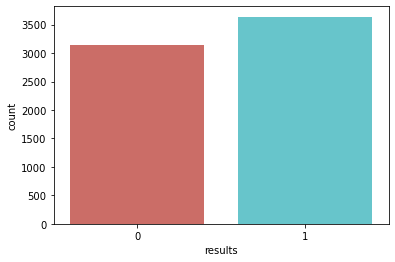

In [23]:
sns.countplot(x='results',data=df, palette='hls')

In [24]:
# Checking the values for different facilities
df['facility_type'].value_counts()

Restaurant                       4682
Grocery Store                     769
School                            396
Children's Services Facility      216
Bakery                             96
                                 ... 
Banquet/kitchen                     1
GAS STATION/CONVENIENCE STORE       1
PALETERIA                           1
smoothie bar                        1
SUPPORTIVE LIVING                   1
Name: facility_type, Length: 115, dtype: int64

In [25]:
df['facility_type'] = df['facility_type'].map(lambda x: 1 if x == 'Restaurant' else 0)

In [26]:
df.isnull().sum()

inspection_id      0
dba_name           0
aka_name           0
license_#          0
facility_type      0
risk               0
address            0
city               0
state              0
zip                0
inspection_date    0
inspection_type    0
results            0
violations         0
dtype: int64

In [27]:
df['facility_type'].value_counts()

1    4682
0    2092
Name: facility_type, dtype: int64

<AxesSubplot:xlabel='facility_type', ylabel='count'>

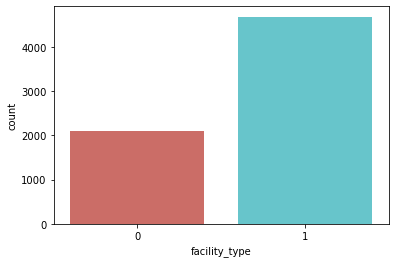

In [28]:
# Number of food inspections by facility type
sns.countplot(x='facility_type',data=df, palette='hls')

In [29]:
#Inspection types
df['inspection_type'].value_counts()

Canvass                                   3473
License                                   1138
Canvass Re-Inspection                      748
Complaint                                  481
License Re-Inspection                      298
Non-Inspection                             253
Complaint Re-Inspection                    213
Short Form Complaint                       137
Recent Inspection                           16
Suspected Food Poisoning                    10
License-Task Force                           2
RECALL INSPECTION                            1
Tag Removal                                  1
Suspected Food Poisoning Re-inspection       1
Task Force Liquor 1475                       1
Consultation                                 1
Name: inspection_type, dtype: int64

In [30]:
# Number of food inspection by inspection date
df['inspection_date'].value_counts()

12-06-2019    27
06/17/2019    24
07-01-2019    23
01/17/2020    23
10/24/2019    22
              ..
08-04-2021     1
03/14/2011     1
05/24/2011     1
01/22/2010     1
09-01-2010     1
Name: inspection_date, Length: 804, dtype: int64

<AxesSubplot:xlabel='risk', ylabel='count'>

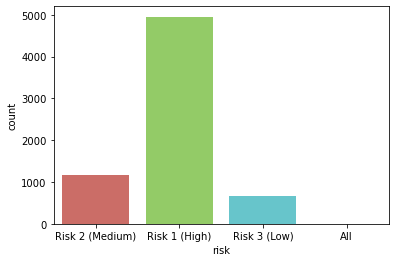

In [31]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

In [32]:
df['zip'].value_counts()

60647.0    272
60614.0    258
60622.0    247
60657.0    245
60618.0    238
          ... 
60438.0      1
60455.0      1
60126.0      1
60193.0      1
90067.0      1
Name: zip, Length: 64, dtype: int64

<AxesSubplot:xlabel='zip', ylabel='count'>

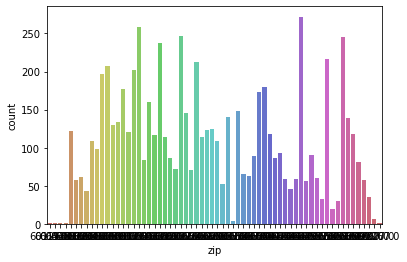

In [33]:
# Number of food inspections by zip
sns.countplot(x='zip',data = df, palette = 'hls')

<AxesSubplot:xlabel='inspection_type', ylabel='count'>

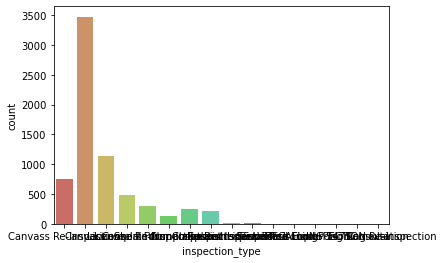

In [34]:
# Number of food inspections by inspection type
sns.countplot(x='inspection_type',data = df,palette = 'hls')

In [35]:
df['risk'].value_counts()

Risk 1 (High)      4954
Risk 2 (Medium)    1162
Risk 3 (Low)        655
All                   3
Name: risk, dtype: int64

In [36]:
df["risk"] = df["risk"].astype('category')
df.dtypes

inspection_id         int64
dba_name             object
aka_name             object
license_#           float64
facility_type         int64
risk               category
address              object
city                 object
state                object
zip                 float64
inspection_date      object
inspection_type      object
results               int64
violations           object
dtype: object

In [37]:
df["risk_cat"] = df["risk"].cat.codes
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,risk_cat
0,2545939,MCDONALDS,MCDONALDS,2349545.0,1,Risk 2 (Medium),3241 W PETERSON AVE,CHICAGO,IL,60659.0,12/22/2021,Canvass Re-Inspection,1,None,2
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,1,Risk 1 (High),4124 W NORTH AVE,CHICAGO,IL,60639.0,12/22/2021,Canvass Re-Inspection,1,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",1
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,0,Risk 2 (Medium),2600 N LINCOLN AVE,CHICAGO,IL,60614.0,12/21/2021,Canvass,0,None,2
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,1,Risk 1 (High),909 N MICHIGAN AVE,CHICAGO,IL,60611.0,12/21/2021,License,1,"7. NO DISCHARGE FROM EYES, NOSE, AND MOUTH | 5...",1
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,1,Risk 1 (High),3529 W FULLERTON AVE,CHICAGO,IL,60647.0,12/21/2021,Complaint,1,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,1


In [38]:
df['risk']= df['risk_cat']

In [39]:
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,risk_cat
0,2545939,MCDONALDS,MCDONALDS,2349545.0,1,2,3241 W PETERSON AVE,CHICAGO,IL,60659.0,12/22/2021,Canvass Re-Inspection,1,None,2
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,1,1,4124 W NORTH AVE,CHICAGO,IL,60639.0,12/22/2021,Canvass Re-Inspection,1,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",1
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,0,2,2600 N LINCOLN AVE,CHICAGO,IL,60614.0,12/21/2021,Canvass,0,None,2
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,1,1,909 N MICHIGAN AVE,CHICAGO,IL,60611.0,12/21/2021,License,1,"7. NO DISCHARGE FROM EYES, NOSE, AND MOUTH | 5...",1
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,1,1,3529 W FULLERTON AVE,CHICAGO,IL,60647.0,12/21/2021,Complaint,1,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,1


<AxesSubplot:xlabel='risk', ylabel='count'>

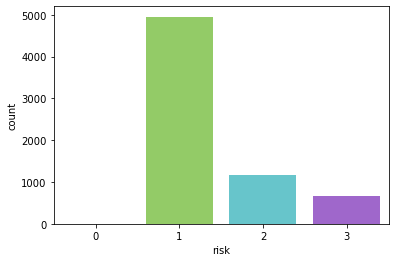

In [40]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

<AxesSubplot:>

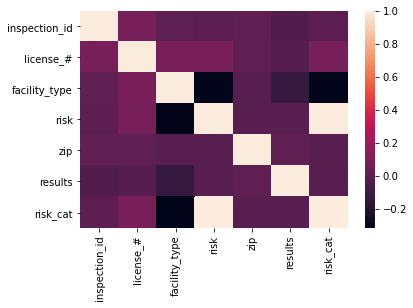

In [41]:
sns.heatmap(df.corr())

In [42]:
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,risk_cat
0,2545939,MCDONALDS,MCDONALDS,2349545.0,1,2,3241 W PETERSON AVE,CHICAGO,IL,60659.0,12/22/2021,Canvass Re-Inspection,1,None,2
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,1,1,4124 W NORTH AVE,CHICAGO,IL,60639.0,12/22/2021,Canvass Re-Inspection,1,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",1
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,0,2,2600 N LINCOLN AVE,CHICAGO,IL,60614.0,12/21/2021,Canvass,0,None,2
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,1,1,909 N MICHIGAN AVE,CHICAGO,IL,60611.0,12/21/2021,License,1,"7. NO DISCHARGE FROM EYES, NOSE, AND MOUTH | 5...",1
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,1,1,3529 W FULLERTON AVE,CHICAGO,IL,60647.0,12/21/2021,Complaint,1,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,1


In [45]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2545939,MCDONALDS,MCDONALDS,2349545.0,Restaurant,Risk 2 (Medium),3241 W PETERSON AVE,CHICAGO,IL,60659.0,12/22/2021,Canvass Re-Inspection,Pass,None,41.990255,-87.710763,"(-87.71076324353396, 41.990254848131904)"
1,2545928,TACONAZO EL ORIGINAL #1,TACONAZO EL ORIGINAL #1,2657927.0,Restaurant,Risk 1 (High),4124 W NORTH AVE,CHICAGO,IL,60639.0,12/22/2021,Canvass Re-Inspection,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",41.909947,-87.729950,"(-87.72995037139705, 41.90994655026227)"
2,2545896,7-ELEVEN #24606,7-ELEVEN #24606,12892.0,Grocery Store,Risk 2 (Medium),2600 N LINCOLN AVE,CHICAGO,IL,60614.0,12/21/2021,Canvass,Out of Business,None,41.928972,-87.653902,"(-87.65390175680133, 41.92897165071963)"
3,2545872,THE WESTIN MICHIGAN AVENUE,909 NORTH,2762706.0,Restaurant,Risk 1 (High),909 N MICHIGAN AVE,CHICAGO,IL,60611.0,12/21/2021,License,Pass,"7. NO DISCHARGE FROM EYES, NOSE, AND MOUTH | 5...",41.899539,-87.623989,"(-87.62398900032618, 41.89953902796158)"
4,2545870,SUPER TAQUERIA EL TACONAZO EL TIO,SUPER TAQUERIA EL TACONAZO EL TIO,2458442.0,Restaurant,Risk 1 (High),3529 W FULLERTON AVE,CHICAGO,IL,60647.0,12/21/2021,Complaint,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.924518,-87.715007,"(-87.71500693855678, 41.92451794921585)"
